In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

sql_connection = sqlite3.connect(r"C:\Users\praveenjaisankar\Documents\Metatrader\src\metatrader\data\tickers_data.db")




In [21]:
df = pd.read_sql("select * from aapl", sql_connection)

In [22]:
df['all_time_high'] = df['close'].expanding().max()
df['drawdown'] = 1 - df['close'] / df['all_time_high']



In [23]:
df_melted = df.melt(id_vars=['time'], value_vars=['close', 'all_time_high'])


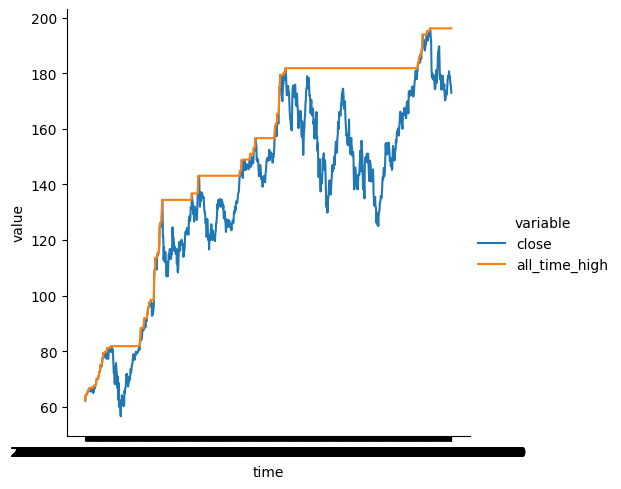

In [24]:
sns.relplot(data=df_melted, kind='line', x='time', y='value', hue='variable')

<Axes: xlabel='time', ylabel='drawdown'>

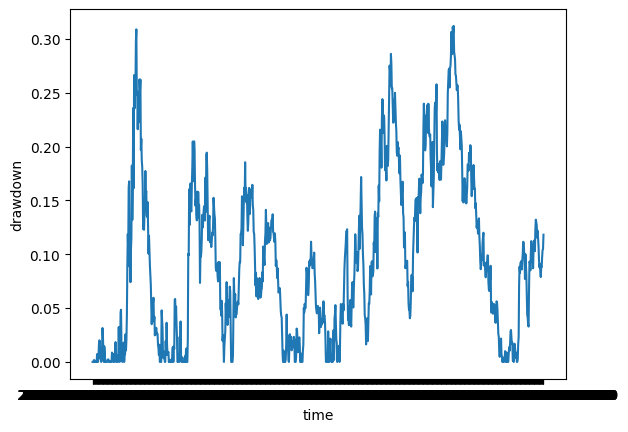

In [25]:
sns.lineplot(data=df, x='time', y='drawdown')